# K Nearest Neighbors (KNN)
We will try implementing a KNN Model on the Iris Dataset from the sklearn library by finding the appropriate suitable related parameters in the data.

## Importing dependencies
Importing dependencies like numpy, pandas, sklearn, matplotlib that we are going to use in the future

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Loading our dataset
We load the Iris dataset and print it's description to see about what the DataFrame object is.

In [2]:
data = load_iris()
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

## Converting our dataset into DataFrame Object
We load our Iris dataset into a Pandas DataFrame object.

In [0]:
df = pd.DataFrame(data= np.c_[data['data'], data['target']], columns=data['feature_names'] + ['target'])

## Describing our dataset
We display the first 10 entries of the DataFrame object and display the summary of the dataset.

In [4]:
df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
5,5.4,3.9,1.7,0.4,0.0
6,4.6,3.4,1.4,0.3,0.0
7,5.0,3.4,1.5,0.2,0.0
8,4.4,2.9,1.4,0.2,0.0
9,4.9,3.1,1.5,0.1,0.0


In [5]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


## Finding relation between the target and features
We plot a graph to see how the target feature vary with different features.

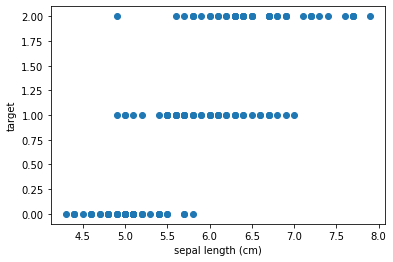

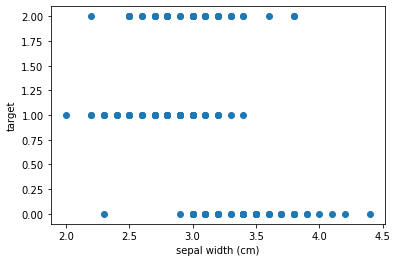

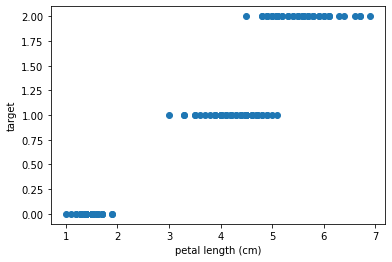

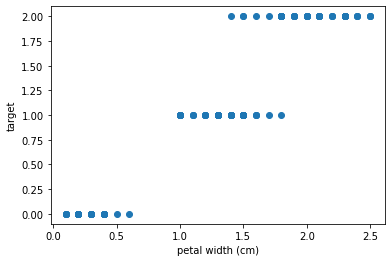

In [6]:
for i in data.feature_names:
  x = df[i]
  y = df['target']
  plt.xlabel(i)
  plt.ylabel('target')
  plt.scatter(x, y)
  plt.show()

## Using heatmaps
Graphs can give a pretty fair picture about the relationship between the targetted data and the feature. But using a heatmap shows a more accurate picture about the correlation between different features and the target variable.

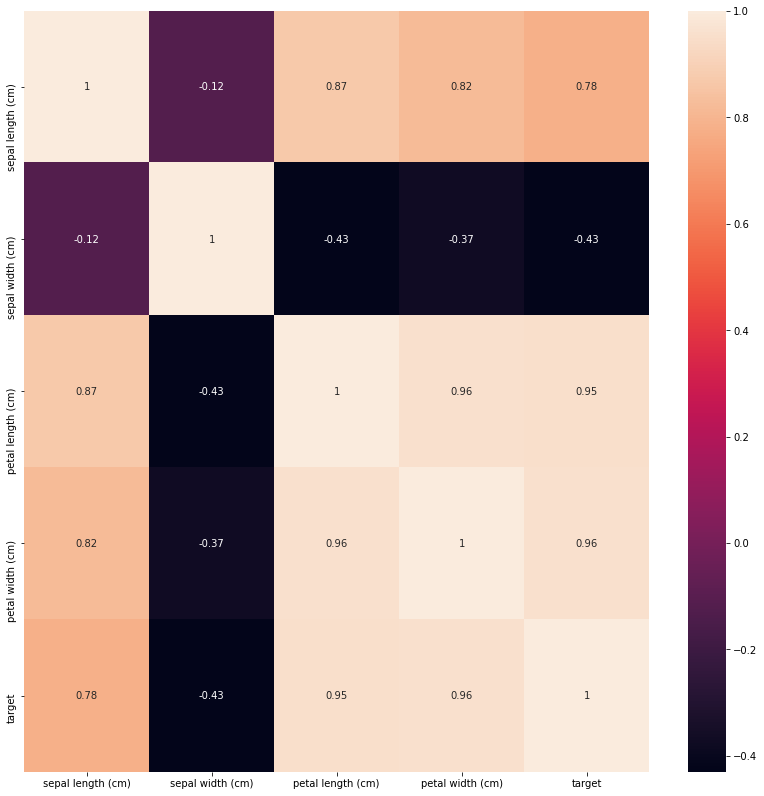

In [7]:
plt.figure(figsize=(14,14))
corr_matrix = df.corr().round(2)
sns.heatmap(data=corr_matrix, annot=True)

Let's see how different features of the dataset depend and vary with each other.

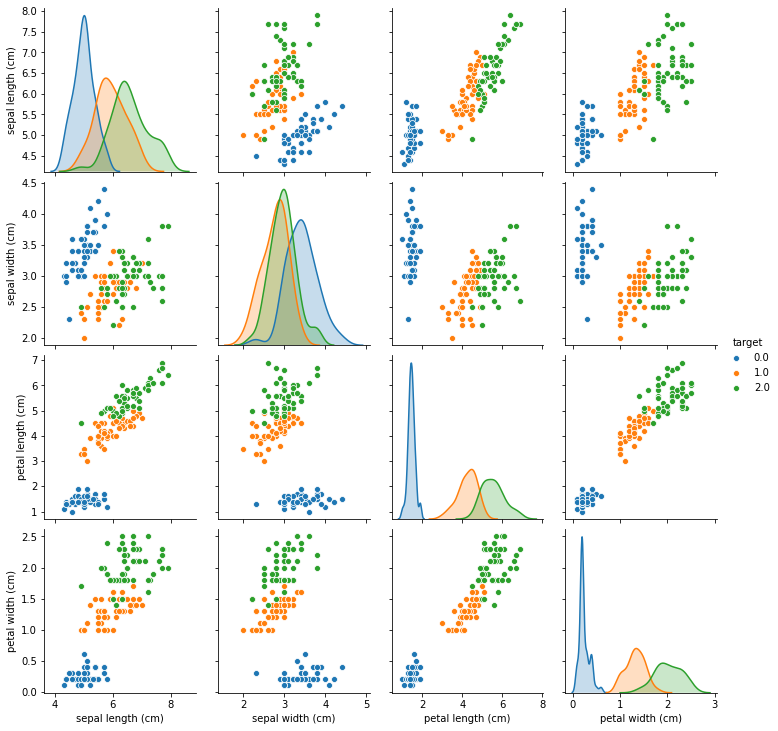

In [8]:
sns.pairplot(df, hue='target')

## Conclusion from Graphs and Heatmaps
Since the dataset doesn't have many features we can shape our X and Y variables without having to drop any feature.

In [0]:
X = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]

In [0]:
Y = df[['target']]

## Splitting the dataset
We use train_test_split to test our dataset into training and testing variables.

In [0]:
X_train, x_test, Y_train, y_test = train_test_split(X, Y, random_state=4, test_size=0.2)

## Finding the value of K
To find the value of k that would give the most suitable result, we use a hit and trial approach. We plot a graph of errors vs k values and pick the value of K where the error becomes minimum.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Text(0, 0.5, 'Error Rate')

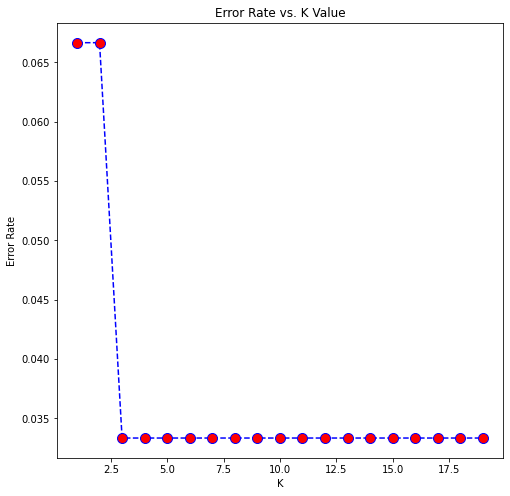

In [12]:
errors = []
for i in range(1, 20):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, Y_train)
  score = knn.score(x_test, y_test)
  errors.append(1 - score)

plt.figure(figsize=(8, 8))
plt.plot(range(1, 20), errors, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value') 
plt.xlabel('K') 
plt.ylabel('Error Rate')

We see that the errors decrease sharply for k = 3. We create a K Nearest Neighbors model, set n_neighbors to 3 and train the KNN model using the fit method.

In [13]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, Y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

We make predictions for the X values in the testing dataset and store it in the y_hat variable. Now we can compare the y_hat variable with the y_test variable to compare the accuracy of our model.

In [0]:
y_hat = model.predict(x_test)

## Calculating our model's efficiency
Calculated the efficiency of our model in different ways.
Using the in-built score method we calculate the performance score of our model.

In [15]:
model.score(x_test, y_test)

0.9666666666666667

### Plotting a confusion matrix
Visualising the predictions of our model in the form of a confusion matrix to see how well our model performs

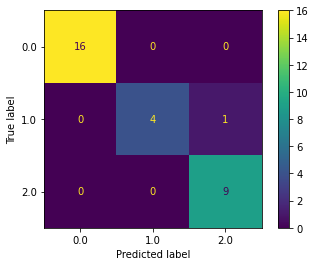

In [16]:
plot_confusion_matrix(model, x_test, y_test)

### Calculating TF, TN, FP, FN
Writing a function to manually calculate the True Positives, False Positives, True Negatives and False Negatives.

In [0]:
def perf_measure(y_actual, y_hat):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_hat)): 
        if y_actual[i]==y_hat[i]==1:
           TP += 1
        if y_hat[i]==1 and y_actual[i]!=y_hat[i]:
           FP += 1
        if y_actual[i]==y_hat[i]==0:
           TN += 1
        if y_hat[i]==0 and y_actual[i]!=y_hat[i]:
           FN += 1

    return(TP, FP, TN, FN)

In [18]:
truePositive, falsePositive, trueNegative, falseNegative = perf_measure(np.asarray(y_test), np.asarray(y_hat))
print("Precision is", (truePositive / (truePositive + falsePositive)))
print("Recall is", (truePositive / (truePositive + falseNegative)))
print("Specificity is", (trueNegative / (trueNegative + falsePositive)))
print("Accuracy is", ((truePositive + trueNegative) / (truePositive + falsePositive + falseNegative + trueNegative)))

Precision is 1.0
Recall is 1.0
Specificity is 1.0
Accuracy is 1.0


### Visualising the model's performance
We plot the actual data and predicted data for different features.

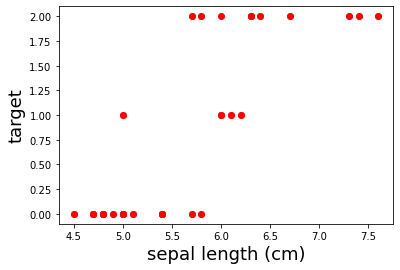

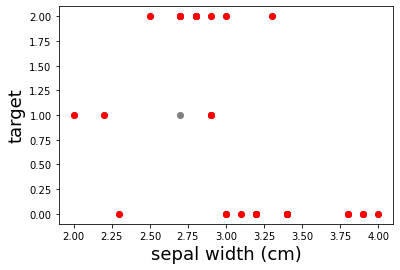

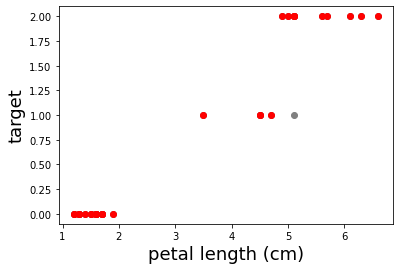

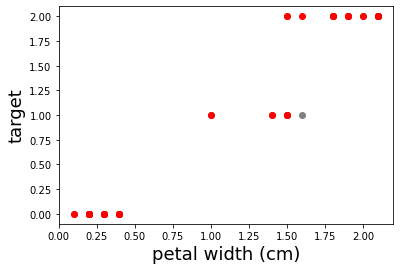

In [19]:
for i in data.feature_names:
  plt.scatter(x_test[i], y_test, color='grey')
  plt.scatter(x_test[i], y_hat, c='red')
  plt.xlabel(i, fontsize=18)
  plt.ylabel("target", fontsize=18)
  plt.show()

# Conclusion
Learned about how to work with K Nearest Neighbors. Displayed the correlation between different features in the dataset using heatmaps and graphs. Also calculated the accuracy, specificity indicating the accuracy of our model. Also, visualised our predictions in the form of a confusion matrix.

The model makes pretty good predictions and has a good accuracy rate.